In [8]:
# Import standard libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [9]:
from sklearn.datasets import load_diabetes

# Load the diabetes dataset
diabetes_data = load_diabetes()

# Convert to DataFrame
diabetes_df = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)

# Bind the disease progression (diabetes target) to the DataFrame
diabetes_df['progression'] = diabetes_data.target


# Display the DataFrame
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [10]:
num_observations = diabetes_df.shape[0]
print("Number of observations:", num_observations)

Number of observations: 442


In [11]:
num_variables = diabetes_df.shape[1]
print("Number of variables:", num_variables)

Number of variables: 11


In [12]:
response_variable_type = diabetes_df['progression'].dtype
print("Variable type of progression:", response_variable_type)

Variable type of progression: float64


In [13]:
num_predictor_variables = diabetes_df.shape[1] - 1  # Excluding the response variable
print("Number of predictor variables:", num_predictor_variables)

Number of predictor variables: 10


Describe the associations being plotted:
Your answer here: The scatter plots show various associations between each predictor variable and the disease progression. Most features exhibit either a positive or negative linear relationship, indicating how changes in these features might influence diabetes progression.

What concept ‘defines’ the plotted line?
Your answer here: The plotted line represents the linear regression model, which defines the relationship between the predictor variable and the response variable by minimizing the mean squared error between the predicted and actual values.

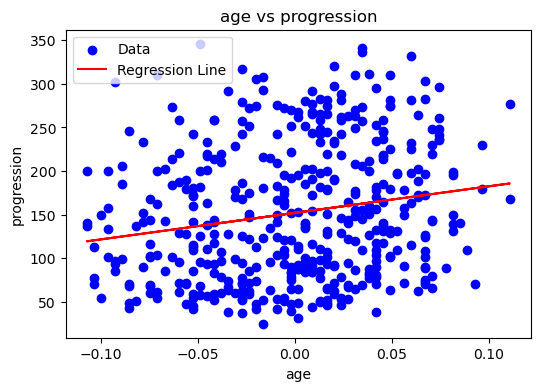

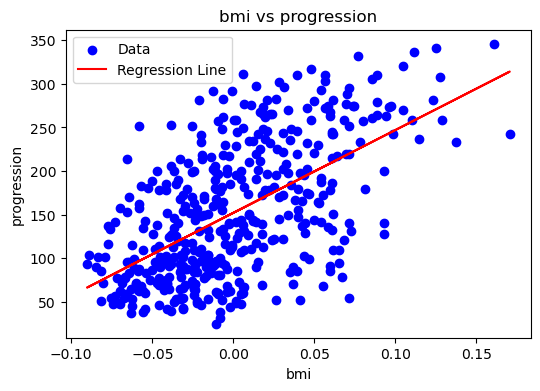

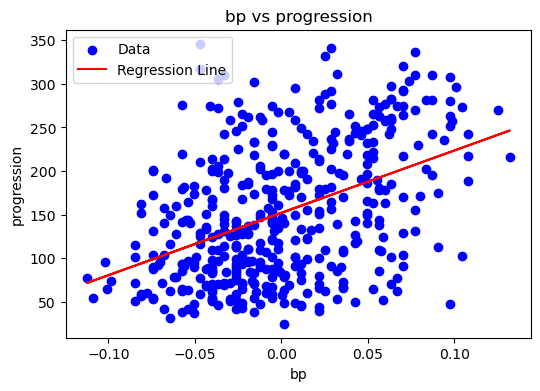

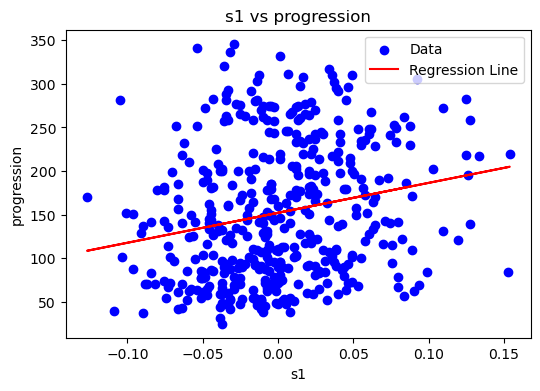

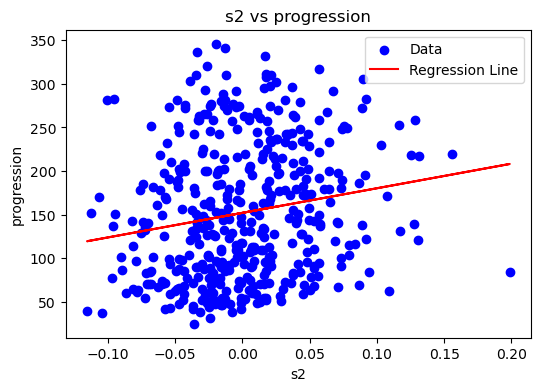

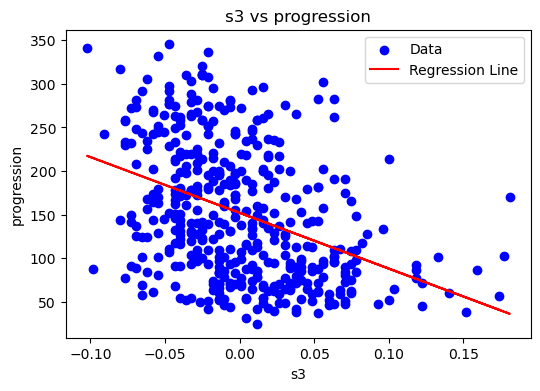

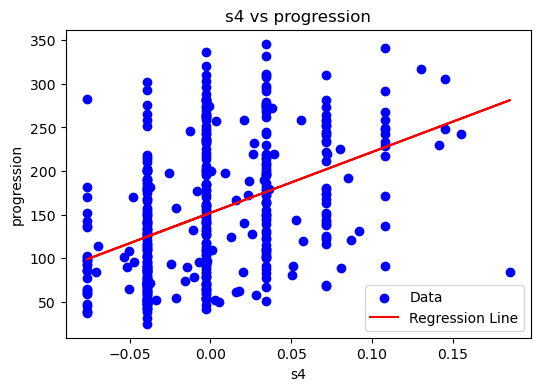

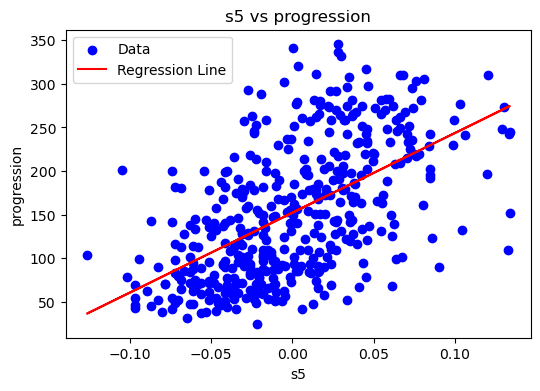

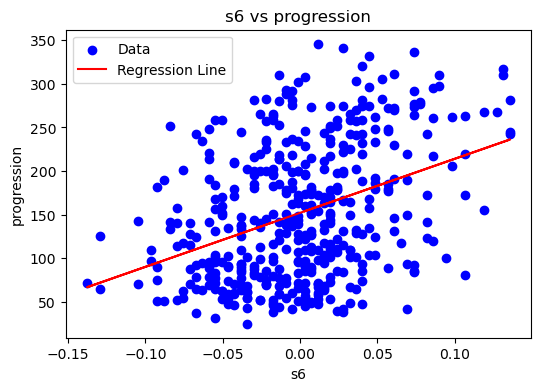

In [14]:
# Exclude the 'sex' column from the feature names since it's categoricla and we are plotting continuous relationships
feature_names = diabetes_df.columns.difference(['progression', 'sex'])

# Loop through each feature (column) in diabetes_df
for feature in feature_names:
    # Extract the feature column and target variable (progression)
    X_feature = diabetes_df[[feature]].values  # Extract as a 2D array
    y = diabetes_df['progression'].values  # Target variable
    
    # Create a scatter plot for the feature against the target (progression)
    plt.figure(figsize=(6, 4))
    plt.scatter(X_feature, y, label='Data', color='blue')

    # Fit a linear regression model
    lm = LinearRegression()
    lm.fit(X_feature, y)

    # Plot the regression line
    plt.plot(X_feature, lm.predict(X_feature), color='red', label='Regression Line')

    # Add labels and title
    plt.xlabel(feature)
    plt.ylabel('progression')
    plt.title(f'{feature} vs progression')

    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()

What is the (implied) null hypothesis? What is the (implied) alternative hypothesis?
Your answer here:
The implied null hypothesis (H0) states that there is no significant relationship between the predictor variables and the disease progression; in other words, the coefficients of all predictors are equal to zero. The implied alternative hypothesis (H1) posits that at least one predictor variable has a significant effect on diabetes progression, indicating that the coefficients of one or more predictors are not equal to zero.

In [15]:
# Select predictors (excluding the last column)
predictors = diabetes_df.iloc[:, :-1]

In [16]:
# Create a random vector of True and False values to split the data
split = np.random.choice([True, False], size=len(predictors), replace=True, p=[0.75, 0.25])

In [17]:
# Split the data into training and testing sets
X_train = predictors[split]
X_test = predictors[~split]
y_train = diabetes_df['progression'][split]
y_test = diabetes_df['progression'][~split]

In [18]:
# Fit the linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [19]:
# Create a DataFrame containing the slope (coefficients) and intercept
predictor_variables = predictors.columns
coefficients_df = pd.DataFrame({"predictor": predictor_variables, "slope": lm.coef_, "intercept": [lm.intercept_] * len(lm.coef_)})

In [20]:
# Display the coefficients DataFrame
print(coefficients_df)

  predictor       slope   intercept
0       age  -25.528767  152.654495
1       sex -234.222215  152.654495
2       bmi  574.757425  152.654495
3        bp  253.115189  152.654495
4        s1 -802.541087  152.654495
5        s2  380.047812  152.654495
6        s3  186.352043  152.654495
7        s4  336.107869  152.654495
8        s5  772.915123  152.654495
9        s6   70.816234  152.654495


In [21]:
# Make predictions on the test set
y_pred = lm.predict(X_test)

In [22]:
# Calculate the Root Mean Squared Error (RMSP)
rms_error = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMS Error:", rms_error)

RMS Error: 50.101540383595086
